In [1]:
import pandas as pd
import numpy as np

In [2]:
sample_data = pd.read_csv(r"C:\Users\dlwlg\Desktop\피처엔지니어링한통합데이터\피처엔지니어링일단다한통합데이터.csv")
# 데이터프레임에서 1000개의 행을 랜덤 샘플링
sampled_df = sample_data.sample(n=1000, random_state=42)  # random_state는 재현성을 위해 설정

In [6]:
sampled_df.to_csv(r'C:\Users\dlwlg\Desktop\피처엔지니어링한통합데이터\서울시_상권_데이터.csv', index=False, encoding='utf-8-sig')

## 매출 예측 머신러닝

Mean Squared Error: 15841990750868694.00


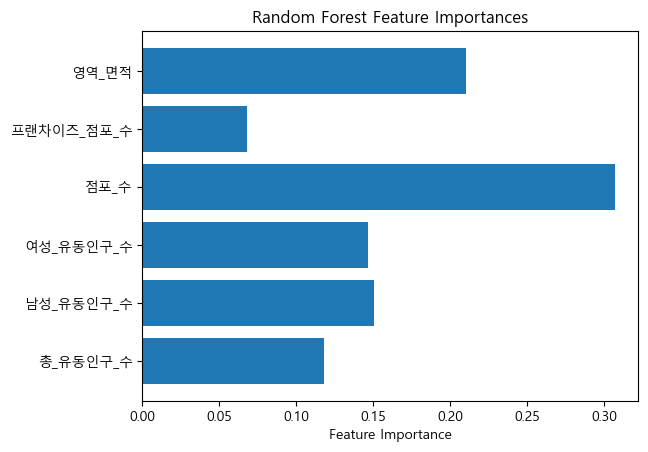

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# 데이터 로드
data = pd.read_csv(r"C:\Users\dlwlg\Desktop\피처엔지니어링한통합데이터\피처엔지니어링일단다한통합데이터.csv")

# 주요 변수 선택 (예: 상권 코드, 유동인구, 점포 수 등)
features = [
    '총_유동인구_수', '남성_유동인구_수', '여성_유동인구_수', 
    '점포_수', '프랜차이즈_점포_수', '영역_면적'
]
target = '당월_매출_금액'

# 결측치 처리
data = data.dropna(subset=features + [target])

# 독립 변수(X)와 종속 변수(y) 분리
X = data[features]
y = data[target]

# 데이터 분할 (훈련:테스트 = 8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# 중요 변수 시각화
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

feature_importances = model.feature_importances_
plt.barh(features, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importances")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder

# 1. 데이터 불러오기 (파일 경로를 실제 데이터 파일로 변경)
data = pd.read_csv(r"C:\Users\dlwlg\Desktop\피처엔지니어링한통합데이터\피처엔지니어링일단다한통합데이터.csv")

# 2. 데이터 전처리
# 타겟 변수(매출 금액)의 결측치 제거
data = data.dropna(subset=['당월_매출_금액'])

# 숫자형 열만 선택하여 중앙값으로 결측치 채우기
numeric_columns = data.select_dtypes(include=['number']).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].median())

# 범주형 데이터(문자열)를 숫자로 변환 (Label Encoding)
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# 입력 변수(features)와 타겟 변수(target) 분리
features = data.drop(columns=['당월_매출_금액'])  # '당월_매출_금액' 제외
target = data['당월_매출_금액']

# 3. 학습 및 테스트 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 4. 모델 생성 및 학습
model = RandomForestRegressor(random_state=42)  # 랜덤 포레스트 회귀 모델 초기화
model.fit(X_train, y_train)  # 모델 학습

# 5. 예측 수행
y_pred = model.predict(X_test)

# 6. 성능 평가
# RMSE 직접 계산
rmse = np.sqrt(np.mean((y_test.values - y_pred) ** 2))  # RMSE 계산
r2 = r2_score(y_test, y_pred)  # R² 계산

print(f"모델 성능 평가:\nRMSE: {rmse:.2f}\nR²: {r2:.2f}")

# 7. 예측값과 실제값 비교
y_test_vs_pred = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("\n예측값과 실제값 비교 (상위 10개):")
print(y_test_vs_pred.head(10))  # 상위 10개만 출력

# 필요시 CSV 파일로 저장 (옵션)
y_test_vs_pred.to_csv('predictions.csv', index=False)
